# Problem Statement
The Management team at Retail store wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

## Dataset 
The company collected the transactional data of customers who purchased products from the retail Stores during Black Friday. The dataset has the following features:   
User_ID: User ID    
Product_ID:	Product ID    
Gender:	Sex of User   
Age:	Age in bins   
Occupation:	Occupation(Masked)    
City_Category:	Category of the City (A,B,C)   
StayInCurrentCityYears:	Number of years stay in current city     
Marital_Status:	Marital Status   
ProductCategory:	Product Category (Masked)     
Purchase:	Purchase Amount    

### Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
wm = pd.read_csv('walmart_data.csv')
wm

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [7]:
wm.shape

(550068, 10)

In [8]:
wm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [9]:
wm.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [15]:
wm['Marital_Status']=wm.Marital_Status.astype('category')

In [17]:
wm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  object  
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  object  
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(1), int64(4), object(5)
memory usage: 38.3+ MB


#### Outlier check

In [20]:
wm.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


<AxesSubplot:xlabel='Purchase'>

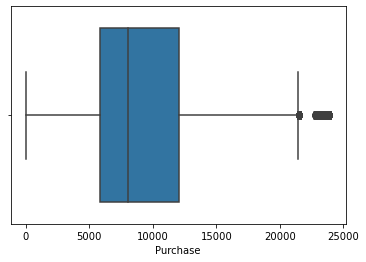

In [18]:
sns.boxplot(x='Purchase',data=wm)

In [33]:
q1 = wm['Purchase'].quantile(0.25)
q3 = wm['Purchase'].quantile(0.75)
iqr = q3-q1
left_whisker = q1 - (1.5*iqr)
right_whisker = q3 + (1.5*iqr)
purchase_ouliers = wm[(wm['Purchase']<left_whisker)|(wm['Purchase']>right_whisker)]
purchase_ouliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [34]:
#the difference between mean and median value of Purchase 
wm['Purchase'].mean() - wm['Purchase'].median()

1216.9687129591257

##### Insights
1. Quartiles : 50 percent of customer spends 8000, 25percent of customer spends <= 5823 and 75 percent of customer spends <= 12000
2. Ouliers based on amount spent : 2677 out of 550068 customers are spending more than 21000
3. The average amount spent is 9263, the mean value here is affected by outlier
4. Based on below box plots there is no much difference in amount spent by males/females also based on their age group

<AxesSubplot:xlabel='Purchase', ylabel='Gender'>

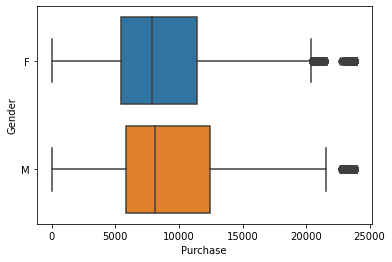

In [38]:
#Box plot on basis of Gender for Purchase
sns.boxplot(x='Purchase',y='Gender',data=wm)

<AxesSubplot:xlabel='Purchase', ylabel='Age'>

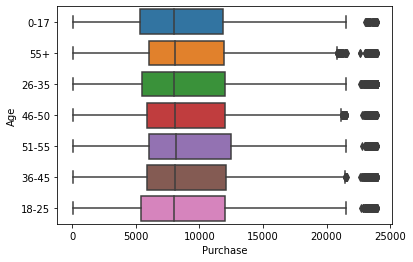

In [41]:
#Box plot on basis of Age for Purchase
sns.boxplot(x='Purchase',y='Age',data=wm)

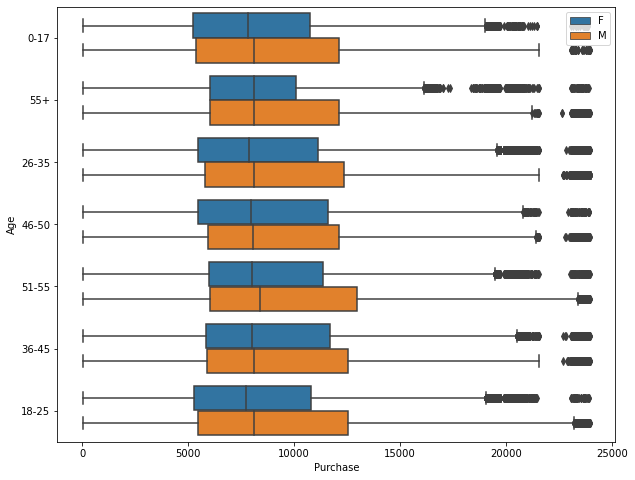

In [62]:
#Box plot on basis of Age and Gender for Purchase
plt.figure(figsize=(10,8))
sns.boxplot(x='Purchase',y='Age', hue='Gender',data=wm)
plt.legend(loc='upper right')

#### Non graphical analysis

In [63]:
wm.groupby('Gender')['Purchase'].agg(['mean','median','min','max'])

,mean,median,min,max
Gender,,,,
F,8734.565765,7914.0,12,23959
M,9437.526040,8098.0,12,23961


In [67]:
wm.groupby(['Gender','Age'])['Purchase'].agg(['mean','median','min','max'])

mean  median  min    max
Gender Age                                   
F      0-17   8338.771985  7824.0   12  23866
       18-25  8343.180201  7731.0   12  23936
       26-35  8728.251754  7886.0   12  23955
       36-45  8959.844056  7984.0   12  23948
       46-50  8842.098947  7957.0   12  23920
       51-55  9042.449666  8002.0   12  23959
       55+    9007.036199  8084.0   12  23899
M      0-17   9235.173670  8080.0   12  23955
       18-25  9440.942971  8119.0   12  23958
       26-35  9410.337578  8082.0   12  23961
       36-45  9453.193643  8092.0   12  23960
       46-50  9357.471509  8074.5   12  23960
       51-55  9705.094802  8398.0   12  23960
       55+    9438.195603  8115.0   12  23960

In [72]:
wm.groupby(['Gender','Age'])['Purchase'].agg(['mean','median','min','max','count'])

mean  median  min    max   count
Gender Age                                           
F      0-17   8338.771985  7824.0   12  23866    5083
       18-25  8343.180201  7731.0   12  23936   24628
       26-35  8728.251754  7886.0   12  23955   50752
       36-45  8959.844056  7984.0   12  23948   27170
       46-50  8842.098947  7957.0   12  23920   13199
       51-55  9042.449666  8002.0   12  23959    9894
       55+    9007.036199  8084.0   12  23899    5083
M      0-17   9235.173670  8080.0   12  23955   10019
       18-25  9440.942971  8119.0   12  23958   75032
       26-35  9410.337578  8082.0   12  23961  168835
       36-45  9453.193643  8092.0   12  23960   82843
       46-50  9357.471509  8074.5   12  23960   32502
       51-55  9705.094802  8398.0   12  23960   28607
       55+    9438.195603  8115.0   12  23960   16421

In [75]:
wm.groupby('Marital_Status')['Purchase'].agg(['mean','median','min','max'])

,mean,median,min,max
Marital_Status,,,,
0,9265.907619,8044.0,12,23961
1,9261.174574,8051.0,12,23961


In [76]:
wm.groupby(['Gender','Marital_Status'])['Purchase'].agg(['mean','median','min','max'])

mean  median  min    max
Gender Marital_Status                                 
F      0               8679.845815  7895.0   12  23955
       1               8810.249789  7939.0   12  23959
M      0               9453.756740  8101.0   12  23961
       1               9413.817605  8094.0   12  23961

##### Insights 
1. We can observed that more number of customers from age group 26-35 are making more purchases compared to all other age groups
2. Less number of purchases made from Females from age group 0-17 and 55+ 
3. No difference in the purchases made by Married/Singles Males/Females

#### Visual analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

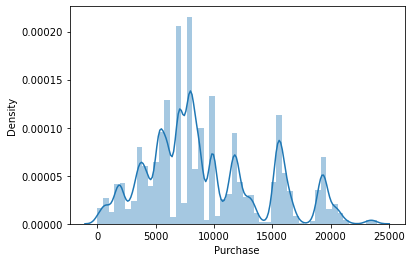

In [78]:
sns.distplot(wm['Purchase'])

##### Insights
1. The data in not normally distributed
2. We can make the data normally distributed by applying CLT 

<AxesSubplot:xlabel='Gender', ylabel='count'>

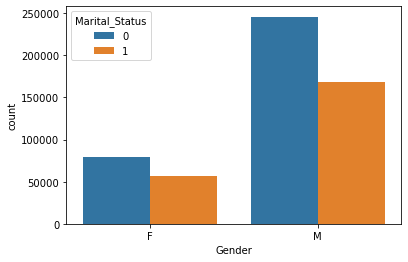

In [88]:
sns.countplot(x='Gender',hue='Marital_Status',data=wm)

##### Insights 
More Single males are there compared to Females

<AxesSubplot:xlabel='Gender', ylabel='count'>

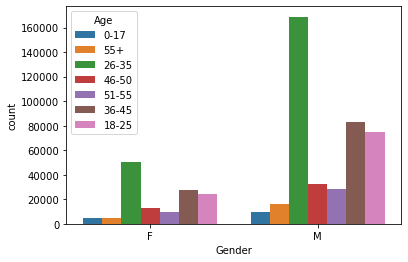

In [89]:
sns.countplot(x='Gender',hue='Age',data=wm)

##### Insights
1. More people fall under age group 26-35 next comes age groups 36-45 and 
2. The number of purchased made by Young Adults and Middle age customers are compared to other age groups

#### Suggestions
Get to know the product that age groups of 0-17 and 55+ are interested and add more such products

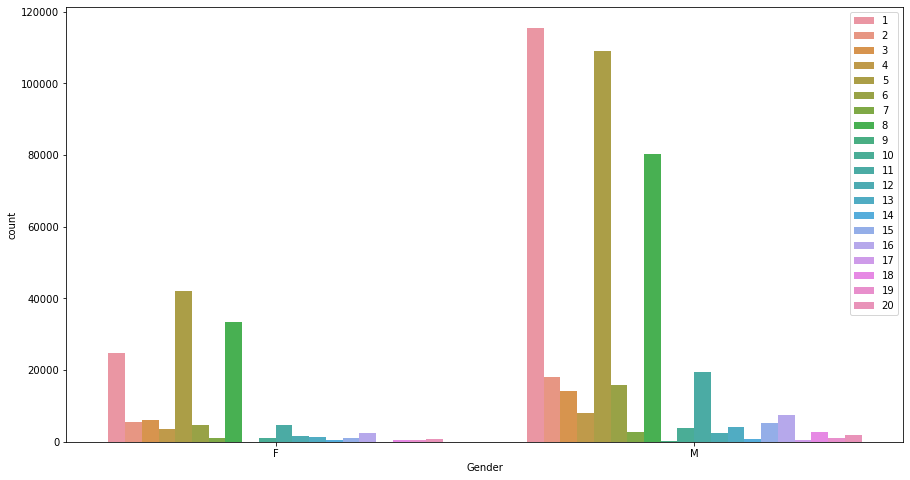

In [97]:
plt.figure(figsize=(15,8))
sns.countplot(x='Gender',hue='Product_Category',data=wm)
plt.legend(loc='upper right')

##### Insights
1. Frequently bought items are of Category - 1,5,8,11
2. More males are buying the Products of category - 1,5,8,11

##### Suggestions
1. Give some Promotional offers to products of other categories to increase sales
2. Temporary discounts to females to increase sales

<AxesSubplot:xlabel='City_Category', ylabel='count'>

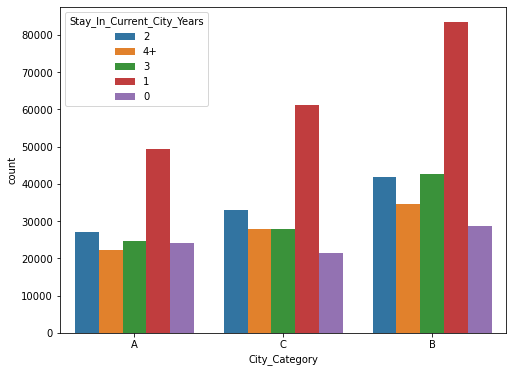

In [104]:
plt.figure(figsize=(8,6))
sns.countplot(x='City_Category',hue='Stay_In_Current_City_Years',data=wm)

##### Insights
In all cities more people are staying for 1 year

In [108]:
wm.groupby(['City_Category','Stay_In_Current_City_Years','Gender'])['Purchase'].agg(['mean','median','max','min','count'])

mean  median    max  \
City_Category Stay_In_Current_City_Years Gender                               
A             0                          F       8580.972178  7855.0  23948   
                                         M       9093.192573  7995.0  23960   
              1                          F       8680.180148  7864.5  23925   
                                         M       8943.479887  7922.0  23958   
              2                          F       8547.461090  7862.0  23913   
                                         M       9113.742346  7998.0  23961   
              3                          F       8408.311403  7783.0  23825   
                                         M       9133.120293  7994.0  23939   
              4+                         F       8644.917994  7864.0  23940   
                                         M       8873.128423  7925.0  23904   
B             0                          F       8297.238398  7767.5  23907   
                                         M       9106.982235  7994.0  23954   
              1                          F       8555.936700  7831.0  23959   
                                         M       9409.082522  8092.0  23960   
              2                          F       8579.422073  7865.0  23859   
                                         M       9367.111528  8073.0  23960   
              3                          F       8668.408562  7868.0  23955   
                                         M       9367.460773  8057.0  23954   
              4+                         F       8500.267117  7869.0  23920   
                                         M       9400.394388  8066.0  23958   
C             0                          F       9099.021290  8074.0  23948   
                                         M       9958.108171  8691.0  23939   
              1                          F       9140.012664  8073.5  23936   
                                         M       9837.141221  8617.0  23961   
              2                          F       9081.918417  8059.0  23899   
                                         M       9999.260975  8695.0  23958   
              3                          F       9086.309857  8062.0  23943   
                                         M       9964.131983  8678.0  23961   
              4+                         F       9232.170937  8115.5  23951   
                                         M       9887.493153  8624.0  23955   

                                                 min  count  
City_Category Stay_In_Current_City_Years Gender              
A             0                          F        12   5032  
                                         M        12  19146  
              1                          F        12  12140  
                                         M        12  37165  
              2                          F        13   6862  
                                         M        12  20252  
              3                          F        12   7463  
                                         M        12  17341  
              4+                         F        12   4207  
                                         M        12  18112  
B             0                          F        24   7240  
                                         M        12  21447  
              1                          F        12  22496  
                                         M        12  60917  
              2                          F        13   9233  
                                         M        12  32539  
              3                          F        12  10838  
                                         M        12  31853  
              4+                         F        12   7989  
                                         M        12  26621  
C             0                          F        12   4791  
                                         M        12  16742  
              1                        

#### Overall sales(in millions)

In [117]:
wm.groupby(['City_Category'])['Purchase'].apply(lambda x:x.sum()/1000000)

City_Category
A    1316.471661
B    2115.533605
C    1663.807476
Name: Purchase, dtype: float64

In [118]:
wm.groupby(['City_Category','Gender'])['Purchase'].apply(lambda x:x.sum()/1000000)`

City_Category  Gender
A              F          306.329915
               M         1010.141746
B              F          493.617008
               M         1621.916597
C              F          386.285719
               M         1277.521757
Name: Purchase, dtype: float64

In [120]:
wm.groupby(['Gender'])['Purchase'].apply(lambda x:x.sum()/1000000)

Gender
F    1186.232642
M    3909.580100
Name: Purchase, dtype: float64

In [122]:
wm.groupby(['Age'])['Purchase'].apply(lambda x:x.sum()/1000000)

Age
0-17      134.913183
18-25     913.848675
26-35    2031.770578
36-45    1026.569884
46-50     420.843403
51-55     367.099644
55+       200.767375
Name: Purchase, dtype: float64

In [121]:
wm.groupby(['Gender','Age'])['Purchase'].apply(lambda x:x.sum()/1000000)

Gender  Age  
F       0-17       42.385978
        18-25     205.475842
        26-35     442.976233
        36-45     243.438963
        46-50     116.706864
        51-55      89.465997
        55+        45.782765
M       0-17       92.527205
        18-25     708.372833
        26-35    1588.794345
        36-45     783.130921
        46-50     304.136539
        51-55     277.633647
        55+       154.984610
Name: Purchase, dtype: float64

In [123]:
wm.groupby(['Marital_Status'])['Purchase'].apply(lambda x:x.sum()/1000000)

Marital_Status
0    3008.927447
1    2086.885295
Name: Purchase, dtype: float64

In [124]:
wm.groupby(['Gender','Marital_Status'])['Purchase'].apply(lambda x:x.sum()/1000000)

Gender  Marital_Status
F       0                  684.154127
        1                  502.078515
M       0                 2324.773320
        1                 1584.806780
Name: Purchase, dtype: float64

In [115]:
wm.groupby(['City_Category','Stay_In_Current_City_Years'])['Purchase'].apply(lambda x:x.sum()/1000000)

City_Category  Stay_In_Current_City_Years
A              0                             217.277717
               1                             437.761817
               2                             243.224188
               3                             221.128667
               4+                            197.079272
B              0                             255.389454
               1                             765.647432
               2                             384.010246
               3                             392.329940
               4+                            318.156533
C              0                             210.312058
               1                             589.463284
               2                             321.939497
               3                             271.444052
               4+                            270.648585
Name: Purchase, dtype: float64

In [114]:
wm.groupby(['City_Category','Stay_In_Current_City_Years','Gender'])['Purchase'].apply(lambda x:x.sum()/1000000)

City_Category  Stay_In_Current_City_Years  Gender
A              0                           F          43.179452
                                           M         174.098265
               1                           F         105.377387
                                           M         332.384430
               2                           F          58.652678
                                           M         184.571510
               3                           F          62.751228
                                           M         158.377439
               4+                          F          36.369170
                                           M         160.710102
B              0                           F          60.072006
                                           M         195.317448
               1                           F         192.474352
                                           M         573.173080
               2                           F          

#### Insights
1. Males are contributing to more sales
2. More sales are from City B
3. In all 3 cities customers who are staying since a year are spending more 
4. Married/Single males are spending more than Married/Single Females
5. Age Group 18-25 are spending more

#### Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

In [3]:
wm_females = wm[wm['Gender']=='F']
wm_males = wm[wm['Gender']=='M']

In [4]:
wm_females_mean = wm_females['Purchase'].mean()
wm_males_mean = wm_males['Purchase'].mean()

In [20]:
print("Sample mean of females: " , wm_females_mean)
print("Sample mean of males:", wm_males_mean)

Sample mean of females:  8734.565765155476
Sample mean of males: 9437.526040472265


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


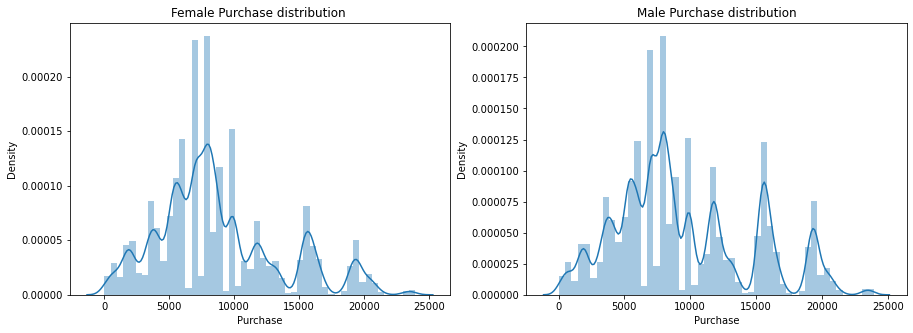

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Female Purchase distribution ')
sns.distplot(wm_females['Purchase'])
plt.subplot(1,2,2)
plt.title('Male Purchase distribution')
sns.distplot(wm_males['Purchase'])
plt.show()

In [8]:
sample_size = 30
no_of_repitions = 1000

####  CLT
Peforming CLT to change the distribution to Normal/ Guassian distribution also we cannot conlcude that Males spend more than females using sample data     
Means of Sample distribution follows Normal distribution with mean = population mean and standard error = population std deviation/(sqrt(n)) 

In [9]:
sample_females = [np.mean(wm_females['Purchase'].sample(sample_size)) for i in range(no_of_repitions)]
sample_males = [np.mean(wm_males['Purchase'].sample(sample_size)) for i in range(no_of_repitions)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


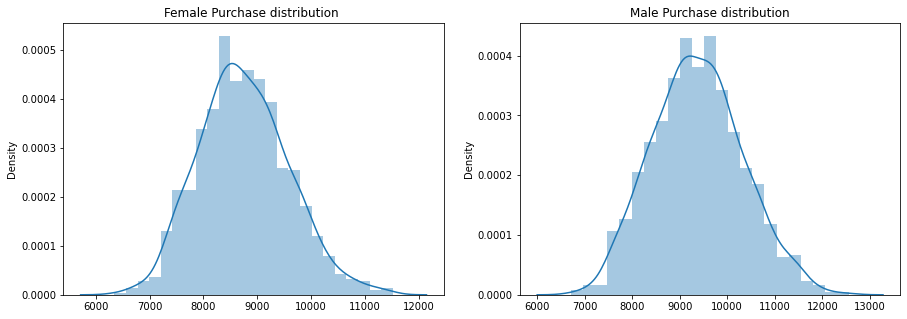

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Female Purchase distribution ')
sns.distplot(sample_females)
plt.subplot(1,2,2)
plt.title('Male Purchase distribution')
sns.distplot(sample_males)
plt.show()

In [11]:
mean_of_sample_means_female = np.mean(sample_females)
mean_of_sample_means_male = np.mean(sample_males)
std_error_females = np.std(sample_females)/(np.sqrt(sample_size))
std_error_males = np.std(sample_males)/(np.sqrt(sample_size))
print('Mean of sample means for female:', mean_of_sample_means_female)
print('Mean of sample means for male:', mean_of_sample_means_male)
print('Standard error for female:', std_error_females)
print('Standard error for male:', std_error_males)

Mean of sample means for female: 8750.8915
Mean of sample means for male: 9381.095166666668
Standard error for female: 151.7774137842522
Standard error for male: 173.03465773995757


#### Observations
Using CLT we can conclude that males spend more than females 

### Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.

1. Computing the interval with 90%

In [57]:
female_interval_90_pctile = norm.interval(0.90, loc=mean_of_sample_means_female, scale=std_error_females)
male_interval_90_pctile = norm.interval(0.90, loc=mean_of_sample_means_male, scale=std_error_males)
print("Mean expenses by female interval with 90% confidence: ", female_interval_90_pctile)
print("Mean expenses by male interval with 90% confidence: ", male_interval_90_pctile)

Mean expenses by female interval with 90% confidence:  (8470.766747059579, 8993.841119607083)
Mean expenses by male interval with 90% confidence:  (9134.56115325576, 9695.52984674424)


2. Computing the interval with 95%

In [56]:
female_interval_95_pctile = norm.interval(0.95, loc=mean_of_sample_means_female, scale=std_error_females)
male_interval_95_pctile = norm.interval(0.95, loc=mean_of_sample_means_male, scale=std_error_males)
print("Mean expenses by female interval with 95% confidence: ", female_interval_95_pctile)
print("Mean expenses by male interval with 95% confidence: ", male_interval_95_pctile)

Mean expenses by female interval with 95% confidence:  (8420.663154290552, 9043.94471237611)
Mean expenses by male interval with 95% confidence:  (9080.82778674072, 9749.26321325928)


3. Computing the interval with 99%

In [58]:
female_interval_99_pctile = norm.interval(0.99, loc=mean_of_sample_means_female, scale=std_error_females)
male_interval_99_pctile = norm.interval(0.99, loc=mean_of_sample_means_male, scale=std_error_males)
print("Mean expenses by female interval with 95% confidence: ", female_interval_99_pctile)
print("Mean expenses by male interval with 95% confidence: ", male_interval_99_pctile)

Mean expenses by female interval with 95% confidence:  (8322.738524391607, 9141.869342275055)
Mean expenses by male interval with 95% confidence:  (8975.808969957136, 9854.282030042865)


**Observations**
1. With **90% and 95% confidence** we can draw conclusions from the samples that **males spend more than females**
2. When the confidence level increases to **99% CI** we can observe the overlap in the spends, here we **cannot make conlusion that males are spending more than females**

### Customer Profiling on spending habbits for Married vs Unmarried 

In [13]:
unmarried = wm[wm['Marital_Status']==0]
married = wm[wm['Marital_Status']==1]

In [14]:
wm_unmarried_mean = unmarried['Purchase'].mean()
wm_married_mean = married['Purchase'].mean()
print("Sample mean of unmarried: " , wm_unmarried_mean)
print("Sample mean of married:", wm_married_mean)

Sample mean of unmarried:  9265.907618921507
Sample mean of married: 9261.174574082374


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


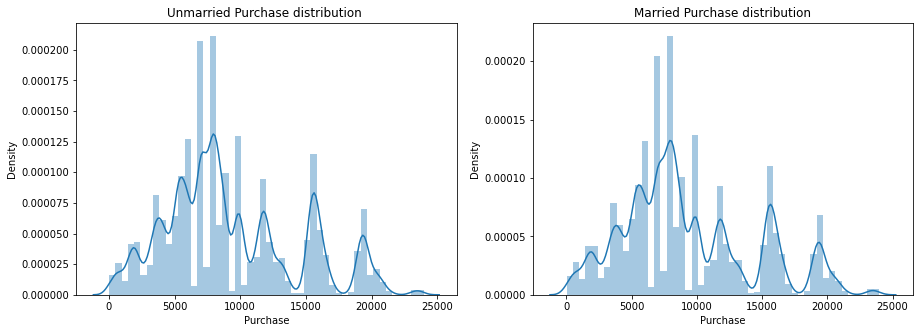

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Unmarried Purchase distribution ')
sns.distplot(unmarried['Purchase'])
plt.subplot(1,2,2)
plt.title('Married Purchase distribution')
sns.distplot(married['Purchase'])
plt.show()

In [16]:
#Performing CLT
sample_size = 50
repitions = 1000
sample_means_unmarried = [np.mean(unmarried['Purchase'].sample(sample_size)) for i in range(no_of_repitions)]
sample_means_married = [np.mean(married['Purchase'].sample(sample_size)) for i in range(no_of_repitions)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


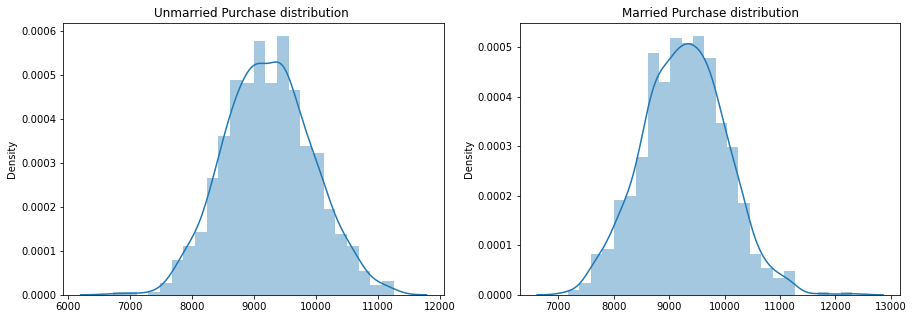

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Unmarried Purchase distribution ')
sns.distplot(sample_means_unmarried)
plt.subplot(1,2,2)
plt.title('Married Purchase distribution')
sns.distplot(sample_means_married)
plt.show()

In [19]:
mean_of_sample_means_unmarried = np.mean(sample_means_unmarried)
mean_of_sample_means_married = np.mean(sample_means_married)
std_error_unmarried = np.std(sample_means_unmarried)/(np.sqrt(sample_size))
std_error_married = np.std(sample_means_married)/(np.sqrt(sample_size))
print('Mean of sample means for Unmarried:', mean_of_sample_means_unmarried)
print('Mean of sample means for Married:', mean_of_sample_means_married)
print('Standard error for Unmarried:', std_error_unmarried)
print('Standard error for Married:', std_error_married)

Mean of sample means for Unmarried: 9235.538
Mean of sample means for Married: 9270.458359999999
Standard error for Unmarried: 98.92365193266977
Standard error for Married: 104.81458188161706


#### Calculation of Intervals with 90, 95 and 99% CI for married vs unmarried

In [20]:
unmarried_interval_90_pctile = norm.interval(0.90, loc=mean_of_sample_means_unmarried, scale=std_error_unmarried)
married_interval_90_pctile = norm.interval(0.90, loc=mean_of_sample_means_married, scale=std_error_married)
print("Mean expenses by Unmarried interval with 90% confidence: ", unmarried_interval_90_pctile)
print("Mean expenses by Married interval with 90% confidence: ", married_interval_90_pctile)

Mean expenses by Unmarried interval with 90% confidence:  (9072.823072327263, 9398.252927672738)
Mean expenses by Married interval with 90% confidence:  (9098.05371483462, 9442.863005165378)


In [21]:
unmarried_interval_95_pctile = norm.interval(0.95, loc=mean_of_sample_means_unmarried, scale=std_error_unmarried)
married_interval_95_pctile = norm.interval(0.95, loc=mean_of_sample_means_married, scale=std_error_married)
print("Mean expenses by Unmarried interval with 95% confidence: ", unmarried_interval_95_pctile)
print("Mean expenses by Married interval with 95% confidence: ", married_interval_95_pctile)

Mean expenses by Unmarried interval with 95% confidence:  (9041.651204992791, 9429.42479500721)
Mean expenses by Married interval with 95% confidence:  (9065.025554457405, 9475.891165542593)


In [22]:
unmarried_interval_99_pctile = norm.interval(0.99, loc=mean_of_sample_means_unmarried, scale=std_error_unmarried)
married_interval_99_pctile = norm.interval(0.99, loc=mean_of_sample_means_married, scale=std_error_married)
print("Mean expenses by Unmarried interval with 95% confidence: ", unmarried_interval_99_pctile)
print("Mean expenses by Married interval with 95% confidence: ", married_interval_99_pctile)

Mean expenses by Unmarried interval with 95% confidence:  (8980.727558537757, 9490.348441462243)
Mean expenses by Married interval with 95% confidence:  (9000.473888550105, 9540.442831449893)


**Observations:**
We have no evidences to draw conclusion in spending habbits of Unmarried vs Married as there is overlapping in all the 
confidence interval taken

### Customer Profiling on spending habbits based on ages

In [28]:
sorted(wm['Age'].unique())

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [29]:
age_grp_0_17 = wm[wm['Age'] == '0-17']
age_grp_18_25 = wm[wm['Age'] == '18-25']
age_grp_26_35 = wm[wm['Age'] == '26-35']
age_grp_36_45 = wm[wm['Age'] == '36-45']
age_grp_46_50 = wm[wm['Age'] == '46-50']
age_grp_51_55 = wm[wm['Age'] == '51-55']
age_grp_abv_55 = wm[wm['Age'] == '55+']

In [31]:
sample_size = 30
repitions = 1000

In [34]:
age_grp_0_17_samples = [np.mean(age_grp_0_17['Purchase'].sample(sample_size)) for i in range(repitions)]
age_grp_18_25_samples = [np.mean(age_grp_18_25['Purchase'].sample(sample_size)) for i in range(repitions)]
age_grp_26_35_samples = [np.mean(age_grp_26_35['Purchase'].sample(sample_size)) for i in range(repitions)]
age_grp_36_45_samples = [np.mean(age_grp_36_45['Purchase'].sample(sample_size)) for i in range(repitions)]
age_grp_46_50_samples = [np.mean(age_grp_46_50['Purchase'].sample(sample_size)) for i in range(repitions)]
age_grp_51_55_samples = [np.mean(age_grp_51_55['Purchase'].sample(sample_size)) for i in range(repitions)]
age_grp_abv_55_samples = [np.mean(age_grp_abv_55['Purchase'].sample(sample_size)) for i in range(repitions)]

In [38]:
mean_of_means_age_grp_0_17_samples = np.mean(age_grp_0_17_samples)
mean_of_means_age_grp_18_25_samples = np.mean(age_grp_18_25_samples)
mean_of_means_age_grp_26_35_samples = np.mean(age_grp_26_35_samples)
mean_of_means_age_grp_36_45_samples = np.mean(age_grp_36_45_samples)
mean_of_means_age_grp_46_50_samples = np.mean(age_grp_46_50_samples)
mean_of_means_age_grp_51_55_samples = np.mean(age_grp_51_55_samples)
mean_of_means_age_grp_abv_55_samples = np.mean(age_grp_abv_55_samples)
std_error_of_age_grp_0_17 = np.std(age_grp_0_17_samples)/(np.sqrt(sample_size))
std_error_of_age_grp_18_25 = np.std(age_grp_18_25_samples)/(np.sqrt(sample_size))
std_error_of_age_grp_26_35 = np.std(age_grp_26_35_samples)/(np.sqrt(sample_size))
std_error_of_age_grp_36_45 = np.std(age_grp_36_45_samples)/(np.sqrt(sample_size))
std_error_of_age_grp_46_50 = np.std(age_grp_46_50_samples)/(np.sqrt(sample_size))
std_error_of_age_grp_51_55 = np.std(age_grp_51_55_samples)/(np.sqrt(sample_size))
std_error_of_age_grp_abv_55 = np.std(age_grp_abv_55_samples)/(np.sqrt(sample_size))
print("Mean of means for age group 0-17: ",mean_of_means_age_grp_0_17_samples)
print("std error for age group 0-17: ",std_error_of_age_grp_0_17)
print("Mean of means for age group 18-25: ",mean_of_means_age_grp_18_25_samples)
print("std error for age group 18-25: ",std_error_of_age_grp_18_25)
print("Mean of means for age group 26_35: ",mean_of_means_age_grp_26_35_samples)
print("std error for age group 26_35: ",std_error_of_age_grp_26_35)
print("Mean of means for age group 36_45: ",mean_of_means_age_grp_36_45_samples)
print("std error for age group 36_45: ",std_error_of_age_grp_36_45)
print("Mean of means for age group 46_50: ",mean_of_means_age_grp_46_50_samples)
print("std error for age group 46_50: ",std_error_of_age_grp_46_50)
print("Mean of means for age group 51_55: ",mean_of_means_age_grp_51_55_samples)
print("std error for age group 51_55: ",std_error_of_age_grp_51_55)
print("Mean of means for age group abv_55: ",mean_of_means_age_grp_abv_55_samples)
print("std error for age group abv_55: ",std_error_of_age_grp_abv_55)

Mean of means for age group 0-17:  8928.500766666666
std error for age group 0-17:  164.10254917789703
Mean of means for age group 18-25:  9216.100166666665
std error for age group 18-25:  161.60601332011535
Mean of means for age group 26_35:  9246.338200000002
std error for age group 26_35:  167.98722983571454
Mean of means for age group 36_45:  9324.609533333334
std error for age group 36_45:  168.4633180578033
Mean of means for age group 46_50:  9214.586800000001
std error for age group 46_50:  169.5396770029543
Mean of means for age group 51_55:  9534.025333333335
std error for age group 51_55:  170.13102281329026
Mean of means for age group abv_55:  9290.362333333333
std error for age group abv_55:  163.4626522602844


#### CI interval calculations for ages

In [41]:
age_0_17_interval_90 = norm.interval(0.95,loc=mean_of_means_age_grp_0_17_samples,scale=std_error_of_age_grp_0_17)
age_16_25_interval_90 = norm.interval(0.95,loc=mean_of_means_age_grp_18_25_samples,scale=std_error_of_age_grp_18_25)
age_26_35_interval_90 = norm.interval(0.95,loc=mean_of_means_age_grp_26_35_samples,scale=std_error_of_age_grp_26_35)
age_36_45_interval_90 = norm.interval(0.95,loc=mean_of_means_age_grp_36_45_samples,scale=std_error_of_age_grp_36_45)
age_46_50_interval_90 = norm.interval(0.95,loc=mean_of_means_age_grp_46_50_samples,scale=std_error_of_age_grp_46_50)
age_51_55_interval_90 = norm.interval(0.95,loc=mean_of_means_age_grp_51_55_samples,scale=std_error_of_age_grp_51_55)
age_abv_55_interval_90 = norm.interval(0.95,loc=mean_of_means_age_grp_abv_55_samples,scale=std_error_of_age_grp_abv_55)
print('Mean expenses by age group 0-17 interval with 95% confidence:',age_0_17_interval_90)
print('Mean expenses by age group 16-25 interval with 95% confidence:',age_16_25_interval_90)
print('Mean expenses by age group 26-35 interval with 95% confidence:',age_26_35_interval_90)
print('Mean expenses by age group 36-45 interval with 95% confidence:',age_36_45_interval_90)
print('Mean expenses by age group 46-50 interval with 95% confidence:',age_46_50_interval_90)
print('Mean expenses by age group 0-17 interval with 95% confidence:',age_51_55_interval_90)
print('Mean expenses by age group 0-17 interval with 95% confidence:',age_abv_55_interval_90)

Mean expenses by age group 0-17 interval with 95% confidence: (8606.865680506775, 9250.135852826557)
Mean expenses by age group 16-25 interval with 95% confidence: (8899.35820087414, 9532.84213245919)
Mean expenses by age group 26-35 interval with 95% confidence: (8917.089279659349, 9575.587120340655)
Mean expenses by age group 36-45 interval with 95% confidence: (8994.427497223924, 9654.791569442745)
Mean expenses by age group 46-50 interval with 95% confidence: (8882.295139123657, 9546.878460876345)
Mean expenses by age group 0-17 interval with 95% confidence: (9200.574655966324, 9867.476010700346)
Mean expenses by age group 0-17 interval with 95% confidence: (8969.98142208578, 9610.743244580884)


#### Observations
Means are overlapping we cannot draw conclusions in spending habbits of different age groups

**Recommendations**
1. It is observed that more number of customers from age group 26-35 are making more purchases so - Add more products that other age groups are also interested in
2. Frequently bought items are of Category - 1,5,8,11 and more males are buying the products from these category - ensure that the products in these category are in stock and temporary discounts to females to increase sales for these items
3. More purchases are happening from City B - Stores in this city can be opened early or start the black friday sale early
4. With 95% confidence, males are contibuting to more sales than females - Give some promotional offers to females and customer segmentation on males to identify the loyal customer in males to give some offers.